#### Importing


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.utils.class_weight import compute_class_weight
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_recall_fscore_support,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    make_scorer,
    classification_report,
    confusion_matrix
)

#### Import the data

In [137]:
data = pd.read_csv(r"C:\Users\mena9\Desktop\למידת מכונה\data.csv")
df = pd.DataFrame(data)


#### EDA

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4792 entries, 0 to 4791
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   שנת לימודים                                     4791 non-null   object 
 1   שם מחוז                                         4791 non-null   object 
 2   שם רשות                                         4791 non-null   object 
 3   סמל מוסד                                        4791 non-null   float64
 4   שם מוסד                                         4791 non-null   object 
 5   חמשון טיפוח                                     4791 non-null   object 
 6   סטטוס מוסד                                      4791 non-null   object 
 7   סוג חינוך מוסד                                  4791 non-null   object 
 8   שלבי חינוך במוסד                                4791 non-null   object 
 9   מגזר                                     

In [139]:
data.head()

,שנת לימודים,שם מחוז,שם רשות,סמל מוסד,שם מוסד,חמשון טיפוח,סטטוס מוסד,סוג חינוך מוסד,שלבי חינוך במוסד,מגזר,...,עלות שעות רשת חינוך עצמאי ומעיין חינוך תורני,שעות מוסדות פטור,עלות שעות מוסדות פטור,שירותי עזר - מוסדות פטור,מספר תלמידים בפועל חינוך רגיל,מספר תלמידים בפועל חינוך מיוחד,מס' כיתות חינוך רגיל,מס' כיתות חינוך מיוחד,"סה""כ תקציב שכר ותשלומים",הערות
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,438,074,176","45,586","187,224,178","27,131,502","1,626,778","67,243","58,310.50","7,841.00","31,375,383,870",NaN
1,תשעו,דרום,תמר,611202.0,"יסודי ע""ש יואב גבעתי",חלש - בינוני,פעיל,רגיל,יסודי בלבד,יהודי,...,0,0,0,0,93,0,3.5,0,"2,023,496",
2,תשעו,דרום,תמר,771105.0,מקיף עין גדי,חלש - בינוני,פעיל,רגיל,"חט""ב ועליונה",יהודי,...,0,0,0,0,186,29,9,4,"6,887,618",
3,תשעו,דרום,תל שבע,610568.0,יסודי חדש שכו 1,,פעיל,רגיל,יסודי בלבד,בדואי,...,0,0,0,0,311,0,11,0,"4,645,181",
4,תשעו,דרום,תל שבע,618140.0,ג'ובראן,חלש,פעיל,רגיל,יסודי בלבד,בדואי,...,0,0,0,0,541,11,21,1,"9,434,769",


#### Cleaning the data

In [140]:
df.columns.tolist() 

['שנת לימודים',
 'שם מחוז',
 'שם רשות',
 'סמל מוסד',
 'שם מוסד',
 'חמשון טיפוח',
 'סטטוס מוסד',
 'סוג חינוך מוסד',
 'שלבי חינוך במוסד',
 'מגזר',
 'סוג פיקוח',
 'מעמד משפטי',
 ' שעות הוראה',
 'עלות  שעות הוראה',
 'שעות פרטניות',
 ' שעות שהיה',
 'שעות הדרכה',
 'עלות תיקצוב שעות הדרכה',
 'שעות איחוד משכורת ',
 ' עלות תיקצוב שעות איחוד משכורת ',
 'שעות בודדות -חנ"מ - חופשות',
 'עלות שעות בודדות -חנ"מ - חופשות',
 'שכ"ל',
 'גני ילדים',
 'שירותי היקף',
 'תקציב הסעות ',
 'פרויקטים והעברות לרשויות מקומיות ובעלויות',
 'שעות רשת חינוך עצמאי ומעיין חינוך תורני ',
 ' עלות שעות רשת חינוך עצמאי ומעיין חינוך תורני ',
 'שעות מוסדות פטור',
 'עלות שעות מוסדות פטור',
 'שירותי עזר - מוסדות פטור',
 'מספר תלמידים בפועל חינוך רגיל',
 'מספר תלמידים בפועל חינוך מיוחד',
 " מס' כיתות  חינוך רגיל",
 " מס' כיתות  חינוך מיוחד",
 'סה"כ תקציב שכר ותשלומים',
 'הערות']

In [141]:
# Checking for missing values
missing_values = data.isnull().sum()
missing_values

שנת לימודים                                       1
שם מחוז                                           1
שם רשות                                           1
סמל מוסד                                          1
שם מוסד                                           1
חמשון טיפוח                                       1
סטטוס מוסד                                        1
סוג חינוך מוסד                                    1
שלבי חינוך במוסד                                  1
מגזר                                              1
סוג פיקוח                                         1
מעמד משפטי                                        1
 שעות הוראה                                       0
עלות  שעות הוראה                                  0
שעות פרטניות                                      0
 שעות שהיה                                        0
שעות הדרכה                                        0
עלות תיקצוב שעות הדרכה                            0
שעות איחוד משכורת                                 0
 עלות תיקצוב

In [142]:
# Removed the first row because it contains the mean of the numerical columns
df = df.drop(0)

In [143]:
# Removed all empty values from the "חמשון טיפוח" column because we had no way to fill this data without making another prediction,
# which could lead to prediction on top of prediction and harm the model.
df = df[df['חמשון טיפוח'] != ' ']

In [144]:
# emoved all these columns because Most of the rows in these columns were empty throughout the dataset or contained irrelevant information
df = df.drop(['הערות', 'סמל מוסד', 'שעות הדרכה', 'עלות תיקצוב שעות הדרכה', 'גני ילדים', 'שנת לימודים'], axis=1)

In [145]:
# Removed all these columns because they were empty in the classification we wanted to predict,
# and therefore could only harm our model
df = df.drop([' שעות הוראה', 'עלות  שעות הוראה', 'שעות פרטניות', ' שעות שהיה', 'שעות איחוד משכורת ', 
              ' עלות תיקצוב שעות איחוד משכורת ', 'שעות בודדות -חנ"מ - חופשות', 
              'עלות שעות בודדות -חנ"מ - חופשות', 'שירותי היקף', 'תקציב הסעות ', 
              'פרויקטים והעברות לרשויות מקומיות ובעלויות', 'שעות רשת חינוך עצמאי ומעיין חינוך תורני ', 
              ' עלות שעות רשת חינוך עצמאי ומעיין חינוך תורני ', 'שעות מוסדות פטור', 
              'עלות שעות מוסדות פטור', 'שירותי עזר - מוסדות פטור', 'מספר תלמידים בפועל חינוך רגיל', 
              'מספר תלמידים בפועל חינוך מיוחד', " מס' כיתות  חינוך רגיל", " מס' כיתות  חינוך מיוחד"], axis=1)

In [146]:
# Checking again for missing values
missing_values = df.isnull().sum()
missing_values

שם מחוז                    0
שם רשות                    0
שם מוסד                    0
חמשון טיפוח                0
סטטוס מוסד                 0
סוג חינוך מוסד             0
שלבי חינוך במוסד           0
מגזר                       0
סוג פיקוח                  0
מעמד משפטי                 0
שכ"ל                       0
סה"כ תקציב שכר ותשלומים    0
dtype: int64

In [147]:
# Columns to convert to int
columns_to_convert_int = [ 'שכ"ל', 'סה"כ תקציב שכר ותשלומים']

# Remove commas, change empty values to 0, and convert the columns to int
for col in columns_to_convert_int:
    df[col] = pd.to_numeric(df[col].str.replace(',', '', regex=False), errors='coerce').fillna(0).astype(int)

# Check the results
df.dtypes

שם מחוז                    object
שם רשות                    object
שם מוסד                    object
חמשון טיפוח                object
סטטוס מוסד                 object
סוג חינוך מוסד             object
שלבי חינוך במוסד           object
מגזר                       object
סוג פיקוח                  object
מעמד משפטי                 object
שכ"ל                        int64
סה"כ תקציב שכר ותשלומים     int64
dtype: object

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4223 entries, 1 to 4789
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   שם מחוז                  4223 non-null   object
 1   שם רשות                  4223 non-null   object
 2   שם מוסד                  4223 non-null   object
 3   חמשון טיפוח              4223 non-null   object
 4   סטטוס מוסד               4223 non-null   object
 5   סוג חינוך מוסד           4223 non-null   object
 6   שלבי חינוך במוסד         4223 non-null   object
 7   מגזר                     4223 non-null   object
 8   סוג פיקוח                4223 non-null   object
 9   מעמד משפטי               4223 non-null   object
 10  שכ"ל                     4223 non-null   int64 
 11  סה"כ תקציב שכר ותשלומים  4223 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 428.9+ KB


In [149]:
df.head(5)

,שם מחוז,שם רשות,שם מוסד,חמשון טיפוח,סטטוס מוסד,סוג חינוך מוסד,שלבי חינוך במוסד,מגזר,סוג פיקוח,מעמד משפטי,"שכ""ל","סה""כ תקציב שכר ותשלומים"
1,דרום,תמר,"יסודי ע""ש יואב גבעתי",חלש - בינוני,פעיל,רגיל,יסודי בלבד,יהודי,ממלכתי,רשמי,0,2023496
2,דרום,תמר,מקיף עין גדי,חלש - בינוני,פעיל,רגיל,"חט""ב ועליונה",יהודי,ממלכתי,רשמי,4225471,6887618
4,דרום,תל שבע,ג'ובראן,חלש,פעיל,רגיל,יסודי בלבד,בדואי,ממלכתי,רשמי,0,9434769
5,דרום,תל שבע,אבו בכר א',חלש,פעיל,רגיל,יסודי בלבד,בדואי,ממלכתי,רשמי,0,9082690
6,דרום,תל שבע,אבו בכר ב',חלש,פעיל,רגיל,יסודי בלבד,בדואי,ממלכתי,רשמי,0,9107519


In [150]:
### CODE BY GPT###
# Removing outliers from the columns 'שכ"ל' and 'סה"כ תקציב שכר ותשלומים

# Function to replace outliers with the mean
def replace_outliers_with_mean(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)  # First quartile
        Q3 = df[column].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1                   # Interquartile range

        lower_bound = Q1 - 1.5 * IQR    # Lower bound
        upper_bound = Q3 + 1.5 * IQR    # Upper bound

        mean_value = df[column].mean()  # Calculate mean

        # Replace outliers with the mean
        df[column] = df[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)

# Choose the columns we want to clean
columns_to_clean = ['שכ"ל', 'סה"כ תקציב שכר ותשלומים']

# Run the function on our data
replace_outliers_with_mean(df, columns_to_clean)
####

In [151]:
# Checking correlation between two columns
correlation = df['סה"כ תקציב שכר ותשלומים'].corr(df['שכ"ל'])
print(f"Correlation (pandas): {correlation}")

Correlation (pandas): 0.22735785775748724


#### one hot encoder & lable encoder

We tested how much normalization/standardization or outlier treatment would affect the normal columns we have in the data (tuition, budget, etc.). And although we didn't show it to you in this document, the effects were radical. Normalization/standardization or outlier treatment completely destroyed the ability of all the models we tried to divide the data, they dramatically damaged the value of the silhouette and the other metrics, so even though it would have made more sense to perform these operations on the numerical columns we have in the data, we decided to leave them in their original form.

In [152]:
### CODE BY GPT###
# Separating the target variable (Institution Status) from the features
X = df.drop(["סטטוס מוסד"], axis=1)
y = df["סטטוס מוסד"]

categorical_features = ["שם מחוז", "שם רשות", "שם מוסד", 
                        "סוג חינוך מוסד", "שלבי חינוך במוסד", 
                        "מגזר", "סוג פיקוח", "מעמד משפטי"]

# Label Encoding for the "חמשון טיפוח" column
label_encoder = LabelEncoder()
X["חמשון טיפוח"] = label_encoder.fit_transform(X["חמשון טיפוח"])

# Converting y to numeric values
y = label_encoder.fit_transform(y)

# Using OneHotEncoder with parameter constraints
one_hot_encoder = OneHotEncoder(
    sparse_output=False, 
    handle_unknown="infrequent_if_exist",  # Rare categories will be merged
    max_categories= 5  # Limiting the number of categories per column to 5
)

column_transformer = ColumnTransformer(
    transformers=[
        ("onehot", one_hot_encoder, categorical_features)
    ],
    remainder="passthrough"
)

X_transformed = column_transformer.fit_transform(X)

# Converting X to DataFrame format
feature_names = column_transformer.get_feature_names_out()
X_transformed = pd.DataFrame(X_transformed, columns=feature_names)

print("Shape after limited OneHot:", X_transformed.shape)
###

Shape after limited OneHot: (4223, 36)


In [153]:
# Displaying which columns passed without OneHotEncoder
non_encoded_columns = list(set(X.columns) - set(categorical_features))
print("Non-encoded columns:", non_encoded_columns)

Non-encoded columns: ['סה"כ תקציב שכר ותשלומים', 'חמשון טיפוח', 'שכ"ל']


##### סינון עמודות נוסף

In [154]:
# Filtering columns with more than 50% missing values
X_transformed = X_transformed.loc[:, X_transformed.isnull().mean() < 0.5]
print("Shape after dropping columns with many NaNs:", X_transformed.shape)

Shape after dropping columns with many NaNs: (4223, 36)


In [155]:
### CODE BY GPT###
# Filtering columns with high correlation
#    First, we focus only on numeric columns (correlation is calculated only on numbers)
numeric_cols = X_transformed.select_dtypes(include=[np.number]).columns

# Calculating the absolute correlation matrix
corr_matrix = X_transformed[numeric_cols].corr().abs()

# Taking only the upper triangle of the matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Collecting the columns that have correlation higher than 0.75 with another column
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]

# Removing these columns from the DataFrame
print("Shape before dropping highly correlated columns:", X_transformed.shape)
X_transformed = X_transformed.drop(columns=to_drop, errors='ignore')
print("Shape after dropping highly correlated columns:", X_transformed.shape)
####

Shape before dropping highly correlated columns: (4223, 36)
Shape after dropping highly correlated columns: (4223, 33)


#### Splitting data into Train/Test

In [156]:
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed,
    y,
    test_size=0.3,
    random_state=42
)

In [157]:
# Ignore warnings related to user warnings
warnings.filterwarnings("ignore", category=UserWarning)

#### LogisticRegression

We used logistic regression in order to compare the results to the results of the rest of the models.

In [ ]:
# Step 1: Initialize Logistic Regression
LR_model = LogisticRegression(
    random_state=42, 
    class_weight='balanced', 
    max_iter=5000
)

# Step 2: Train the Model
LR_model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred_LR = LR_model.predict(X_test)

# Step 4: Evaluate the Model
print("\tLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_LR))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_LR))

	Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.49        16
           1       1.00      0.97      0.99      1251

    accuracy                           0.97      1267
   macro avg       0.66      0.99      0.74      1267
weighted avg       0.99      0.97      0.98      1267

Logistic Regression Confusion Matrix:
[[  16    0]
 [  33 1218]]


	Logistic Regression SFS Feature Importances
1. onehot__שם מחוז_מרכז: 29.0000
2. onehot__מעמד משפטי_פטור: 10.0000
3. onehot__מעמד משפטי_מוכר: 32.0000
4. onehot__שם מחוז_תל אביב: 3.0000
5. onehot__שלבי חינוך במוסד_חט"ב ועליונה: 2.0000
6. onehot__שלבי חינוך במוסד_עליונה בלבד: 26.0000
7. onehot__שם רשות_ירושלים: 25.0000
8. onehot__סוג פיקוח_חרדי: 20.0000
9. onehot__שם רשות_infrequent_sklearn: 4.0000
10. onehot__שם מחוז_infrequent_sklearn: 17.0000


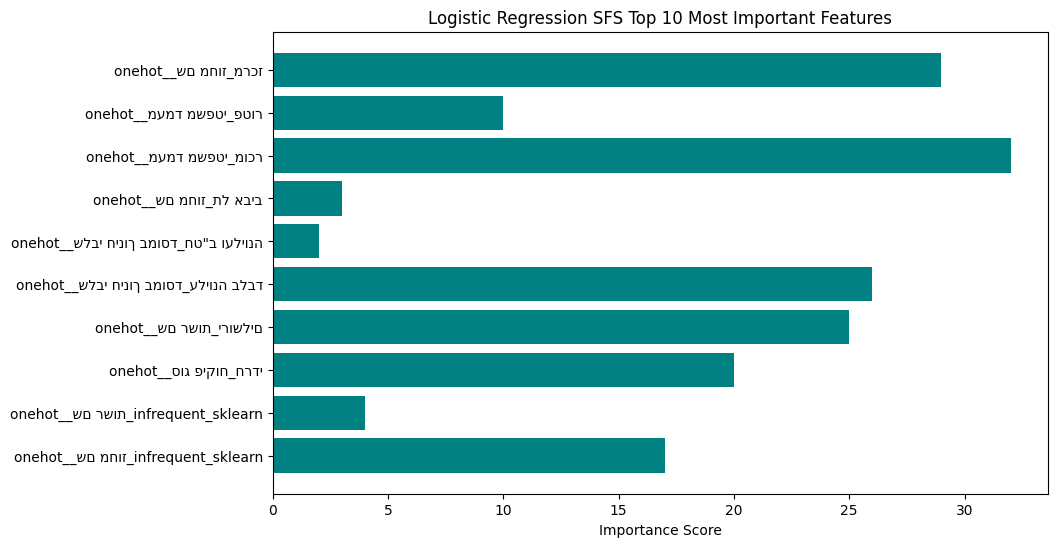

In [159]:
# Step 5: Permutation Feature Importance
feature_importances_LR = np.abs(LR_model.coef_[0])
sorted_indices_LR = np.argsort(feature_importances_LR)[::-1]

# Step 6: Print top 10 features
print("\tLogistic Regression SFS Feature Importances")
for i, index in enumerate(sorted_indices_LR[:10]):  # Top 10 features
    print(f"{i+1}. {X_train.columns[index]}: {sorted_indices_LR[index]:.4f}")

# Step 7: Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_indices_LR[:10]], sorted_indices_LR[sorted_indices_LR[:10]], color='teal')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Logistic Regression SFS Top 10 Most Important Features")
plt.show()

#### SVC

In [160]:
# Step 1: Initialize SVM Model
SVC_model = SVC(
    random_state=42, 
    class_weight='balanced', 
    kernel='rbf', 
    probability=True
)

# Step 2: Train the Model
SVC_model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred_svm = SVC_model.predict(X_test)

# Step 4: Evaluate the Model
print("\n\tSVC CLASSIFICATION REPORT")
print(classification_report(y_test, y_pred_svm))

print("\nSVC CONFUSION MATRIX")
print(confusion_matrix(y_test, y_pred_svm))


	SVC CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.15      1.00      0.26        16
           1       1.00      0.93      0.96      1251

    accuracy                           0.93      1267
   macro avg       0.57      0.96      0.61      1267
weighted avg       0.99      0.93      0.95      1267


SVC CONFUSION MATRIX
[[  16    0]
 [  92 1159]]



	SVM FEATURE IMPORTANCES
1. remainder__סה"כ תקציב שכר ותשלומים: 0.0106
2. remainder__חמשון טיפוח: 0.0000
3. onehot__מעמד משפטי_תרבותי-ייחודי: 0.0000
4. onehot__מעמד משפטי_פטור: 0.0000
5. onehot__מעמד משפטי_מוכר: 0.0000
6. onehot__סוג פיקוח_ממלכתי דתי: 0.0000
7. onehot__סוג פיקוח_ממלכתי: 0.0000
8. onehot__סוג פיקוח_חרדי: 0.0000
9. onehot__מגזר_infrequent_sklearn: 0.0000
10. onehot__מגזר_יהודי: 0.0000


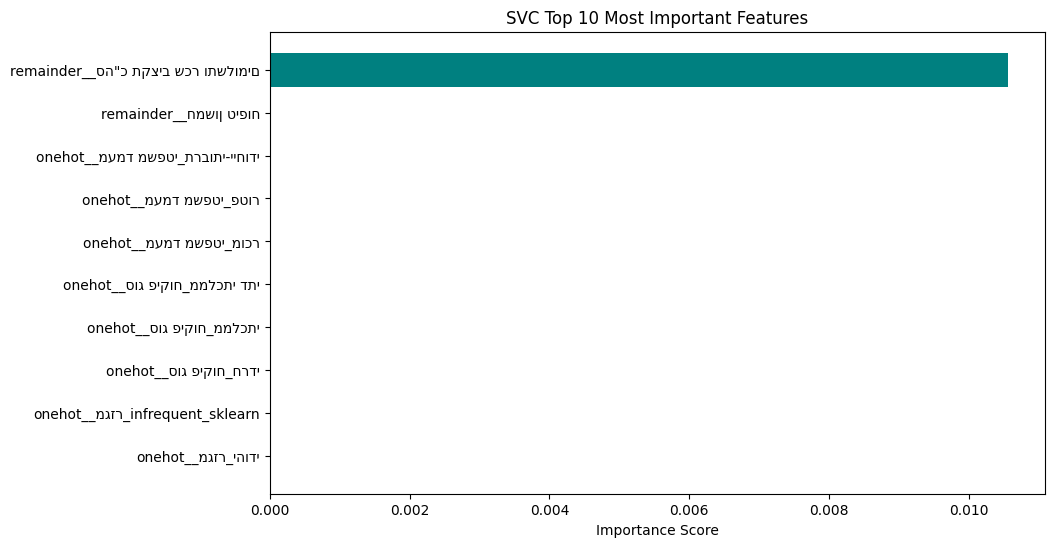

In [161]:
# Step 5: Permutation Feature Importance
feature_importances_SVC = permutation_importance(
    SVC_model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1
)
sorted_indices_SVC = feature_importances_SVC.importances_mean.argsort()[::-1]

# Step 6: Print top 10 features
print("\n\tSVM FEATURE IMPORTANCES")
for i, index in enumerate(sorted_indices_SVC[:10]):  # Top 10 features
    print(f"{i+1}. {X_train.columns[index]}: {feature_importances_SVC.importances_mean[index]:.4f}")

# Step 7: Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_indices_SVC[:10]], feature_importances_SVC.importances_mean[sorted_indices_SVC[:10]], color='teal')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("SVC Top 10 Most Important Features")
plt.show()

#### Gradient Boosting Classifier

In [162]:
# Step 1: Initialize GBM Model
GBM_model = GradientBoostingClassifier(
    random_state=42
)

# Step 2: Train the Model
GBM_model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred_gbm = GBM_model.predict(X_test)

# Step 4: Evaluate the Model
print("\n\tGBM Classification Report")
print(classification_report(y_test, y_pred_gbm))

print("\nGBM Confusion Matrix")
print(confusion_matrix(y_test, y_pred_gbm))


	GBM Classification Report
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        16
           1       1.00      1.00      1.00      1251

    accuracy                           0.99      1267
   macro avg       0.86      0.84      0.85      1267
weighted avg       0.99      0.99      0.99      1267


GBM Confusion Matrix
[[  11    5]
 [   4 1247]]



	GBM Feature Importances
1. remainder__סה"כ תקציב שכר ותשלומים: 0.8936
2. onehot__שם מחוז_מרכז: 0.0517
3. onehot__סוג פיקוח_ממלכתי: 0.0210
4. onehot__שם רשות_בני ברק: 0.0086
5. onehot__מגזר_יהודי: 0.0054
6. onehot__שם מחוז_צפון: 0.0049
7. onehot__שלבי חינוך במוסד_יסודי בלבד: 0.0049
8. onehot__סוג פיקוח_חרדי: 0.0049
9. onehot__שלבי חינוך במוסד_עליונה בלבד: 0.0033
10. remainder__חמשון טיפוח: 0.0017


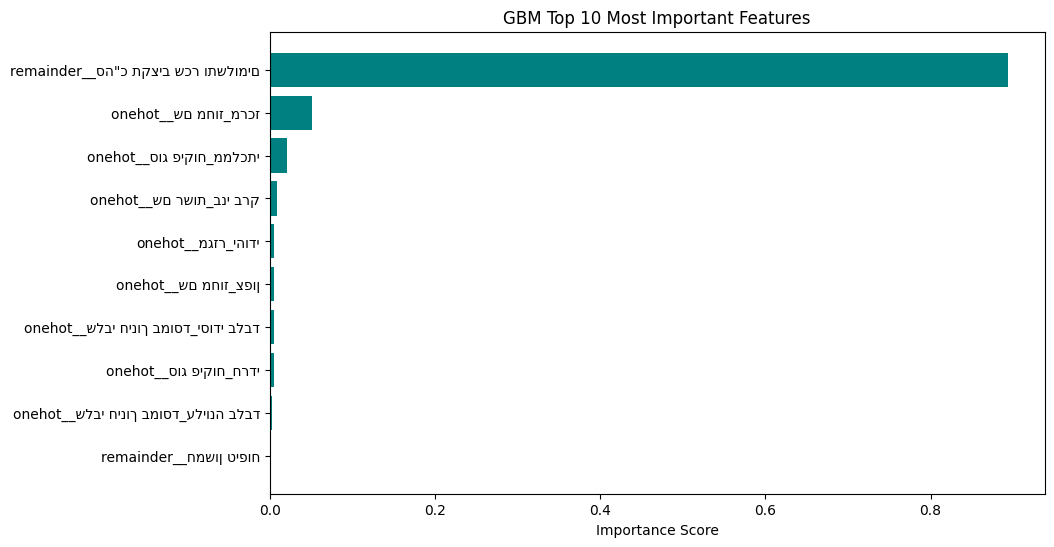

In [163]:
# Step 5: Permutation Feature Importance
feature_importances_GBM = GBM_model.feature_importances_
sorted_indices_GBM = np.argsort(feature_importances_GBM)[::-1]

# step 6: Print top 10 features
print("\n\t GBM Feature Importances")
for i, index in enumerate(sorted_indices_GBM[:10]):  # Top 10 features
    print(f"{i+1}. {X_train.columns[index]}: {feature_importances_GBM[index]:.4f}")

# step 7: Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_indices_GBM[:10]], feature_importances_GBM[sorted_indices_GBM[:10]], color='teal')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("GBM Top 10 Most Important Features")
plt.show()

##### SFS Gradient Boosting Classifier

In [ ]:
### CODE BY GPT###
# Define custom F1 scorer
my_f1_scorer = make_scorer(f1_score)

# Feature Selection
sfs_GBM = SFS(
    GBM_model, 
    k_features='best',
    forward=True,
    floating=False,
    scoring=my_f1_scorer,
    cv=5
)

# Run the Feature Selection process
sfs_GBM.fit(X_train, y_train)
####

SequentialFeatureSelector(estimator=GradientBoostingClassifier(random_state=42),
                          k_features=(1, 33),
                          scoring=make_scorer(f1_score, response_method='predict'))

In [165]:
### CODE BY GPT###
# Selection of the chosen features
selected_features_GBM = list(sfs_GBM.k_feature_names_)
X_train_selected_GBM = X_train[selected_features_GBM]
X_test_selected_GBM = X_test[selected_features_GBM]

# Train the model with the selected features
GBM_model.fit(X_train_selected_GBM, y_train)
y_pred_selected_GBM = GBM_model.predict(X_test_selected_GBM)
####

# Model evaluation
print("\n\t GBM SFS Feature Importances")
print(classification_report(y_test, y_pred_selected_GBM, digits=3))

# Calculate Confusion Matrix
print("\n GBM SFS Confusion Matrix")
conf_matrix_GBM = confusion_matrix(y_test, y_pred_selected_GBM)
print(conf_matrix_GBM)


	GBM SFS Feature Importances
              precision    recall  f1-score   support

           0      0.688     0.688     0.688        16
           1      0.996     0.996     0.996      1251

    accuracy                          0.992      1267
   macro avg      0.842     0.842     0.842      1267
weighted avg      0.992     0.992     0.992      1267


GBM SFS Confusion Matrix
[[  11    5]
 [   5 1246]]



	GBM SFS Feature Importances
1. onehot__שם מחוז_תל אביב: 0.9018
2. onehot__שם מחוז_צפון: 0.0714
3. onehot__שם מחוז_מרכז: 0.0267
4. onehot__שם מחוז_ירושלים: 0.0000


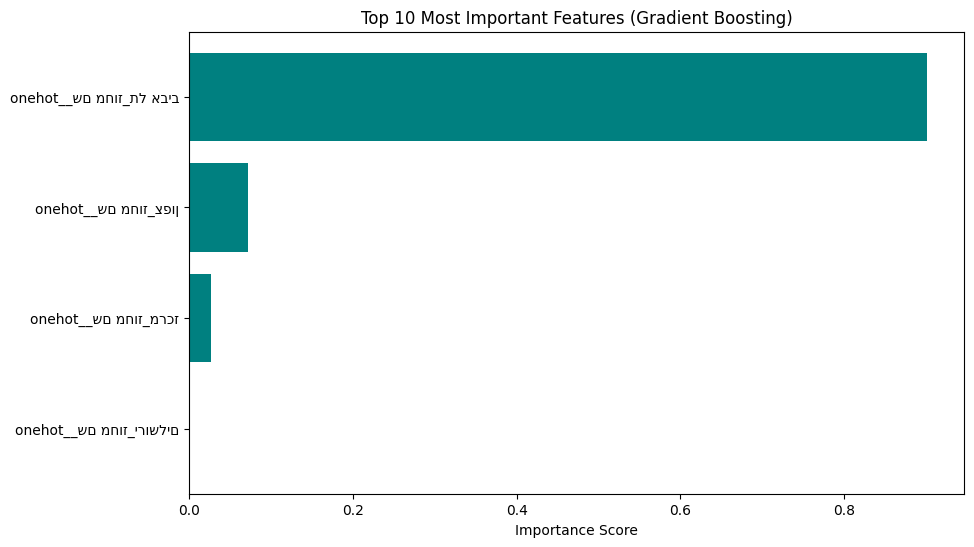

In [166]:
# Permutation Feature Importance
feature_importances_GBM = GBM_model.feature_importances_
sorted_indices_GBM = np.argsort(feature_importances_GBM)[::-1]

# Print top 10 features
print("\n\tGBM SFS Feature Importances")
for i, index in enumerate(sorted_indices_GBM[:10]):  # Top 10 features
    print(f"{i+1}. {X_train.columns[index]}: {feature_importances_GBM[index]:.4f}")

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_indices_GBM[:10]], feature_importances_GBM[sorted_indices_GBM[:10]], color='teal')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Top 10 Most Important Features (Gradient Boosting)")
plt.show()

#### Randomforest

In [ ]:
# Defining the model
RF_model = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)

# Training the model 
RF_model.fit(X_train, y_train)

# Prediction 
y_pred_RF = RF_model.predict(X_test)

# Evaluation
print("\n\tRandom Forest Feature Importances")
print(classification_report(y_test, y_pred_RF))

# Calculate Confusion Matrix
conf_matrix_RF = confusion_matrix(y_test, y_pred_RF)
print("\nRandom ForestFeature Confusion Matrix:")
print(conf_matrix_RF)


	Random Forest Feature Importances
              precision    recall  f1-score   support

           0       0.83      0.31      0.45        16
           1       0.99      1.00      1.00      1251

    accuracy                           0.99      1267
   macro avg       0.91      0.66      0.72      1267
weighted avg       0.99      0.99      0.99      1267


Random ForestFeature Confusion Matrix:
[[   5   11]
 [   1 1250]]



--- Feature Importances ---
1. remainder__סה"כ תקציב שכר ותשלומים: 0.5387
2. onehot__שלבי חינוך במוסד_עליונה בלבד: 0.0749
3. onehot__שלבי חינוך במוסד_יסודי בלבד: 0.0536
4. onehot__שם מחוז_ירושלים: 0.0402
5. onehot__שם רשות_ירושלים: 0.0387
6. remainder__חמשון טיפוח: 0.0380
7. onehot__מעמד משפטי_מוכר: 0.0366
8. onehot__סוג פיקוח_חרדי: 0.0315
9. onehot__סוג פיקוח_ממלכתי: 0.0212
10. onehot__שם רשות_infrequent_sklearn: 0.0191


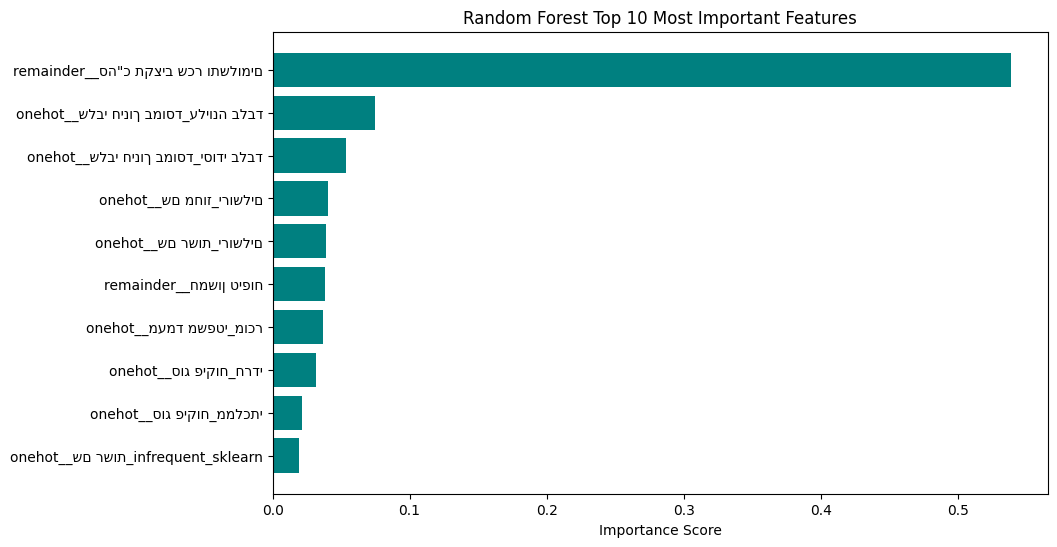

In [ ]:
# Feature Importance for the trained Random Forest model
feature_importances_RF = RF_model.feature_importances_  # Random Forest provides feature_importances_
sorted_indices_RF = np.argsort(feature_importances_RF)[::-1]

# Print top 10 features
print("\n\t Random Forest Feature Importances ---")
for i, index in enumerate(sorted_indices_RF[:10]):  # Top 10 most important features
    print(f"{i+1}. {X_train.columns[index]}: {feature_importances_RF[index]:.4f}")

# Plotting Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_indices_RF[:10]], feature_importances_RF[sorted_indices_RF[:10]], color='teal')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Random Forest Top 10 Most Important Features")
plt.show()


##### SFS RandomForest

In [ ]:
### CODE BY GPT###
# Defining a custom scorer for F1
my_f1_scorer = make_scorer(f1_score)

precision_recall_fscore_support(y_true= y_test, y_pred= y_pred_RF , pos_label=0)

# Feature Selection (Forward Selection)
sfs_RF = SFS(
    RF_model,
    k_features='best',    
    forward=True,
    floating=False,
    scoring=my_f1_scorer,
    cv=5
)
sfs_RF.fit(X_train, y_train)
####

SequentialFeatureSelector(estimator=RandomForestClassifier(class_weight='balanced',
                                                           random_state=42),
                          k_features=(1, 33),
                          scoring=make_scorer(f1_score, response_method='predict'))

In [ ]:
### CODE BY GPT###
# Selection of the chosen features
selected_features_RF = list(sfs_RF.k_feature_names_)  
X_train_selected_RF = X_train[selected_features_RF]   
X_test_selected_RF = X_test[selected_features_RF]     

# Train the model with the selected features
RF_model.fit(X_train_selected_RF, y_train)
y_pred_selected_RF = RF_model.predict(X_test_selected_RF)
####

# Model evaluation
print("\n\tRandom Forest SFS Feature Importances")
print(classification_report(y_test, y_pred_selected_RF, digits=3))

# Calculating Confusion Matrix
conf_matrix__RF_SFS = confusion_matrix(y_test, y_pred_selected_RF)  # Calculate confusion matrix
print("\nRandom Forest SFS Confusion Matrix:")  # Display confusion matrix
print(conf_matrix__RF_SFS)


	Random Forest SFS Feature Importances
              precision    recall  f1-score   support

           0      0.727     0.500     0.593        16
           1      0.994     0.998     0.996      1251

    accuracy                          0.991      1267
   macro avg      0.860     0.749     0.794      1267
weighted avg      0.990     0.991     0.991      1267


Random Forest SFS Confusion Matrix:
[[   8    8]
 [   3 1248]]



	Random Forest SFS Feature Importances
1. onehot__שלבי חינוך במוסד_יסודי בלבד: 0.6501
2. onehot__שם מוסד_תיכון טכנולוגי נעמת: 0.1197
3. onehot__שלבי חינוך במוסד_חט"ב בלבד: 0.0588
4. onehot__שם מחוז_ירושלים: 0.0566
5. onehot__שם מחוז_תל אביב: 0.0291
6. onehot__שם מוסד_infrequent_sklearn: 0.0248
7. onehot__שלבי חינוך במוסד_חט"ב ועליונה: 0.0143
8. onehot__שם מחוז_צפון: 0.0133
9. onehot__שם מחוז_מרכז: 0.0126
10. onehot__שם מחוז_infrequent_sklearn: 0.0106


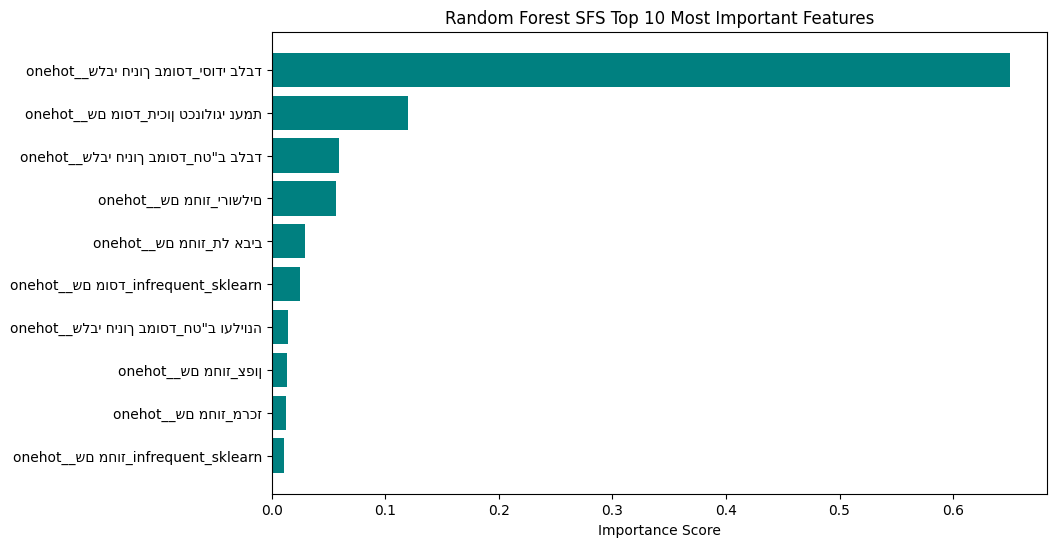

In [ ]:
# Feature Importance for the best model
feature_importances_RF_SFS = RF_model.feature_importances_  # RF gives feature_importances_
sorted_indices_RF_SFS = np.argsort(feature_importances_RF_SFS)[::-1]

# Print top 10 features
print("\n\t Random Forest SFS Feature Importances")
for i, index in enumerate(sorted_indices_RF_SFS[:10]):  # Top 10 most important features
    print(f"{i+1}. {X_train.columns[index]}: {feature_importances_RF_SFS[index]:.4f}")

# Plotting Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_indices_RF_SFS[:10]], feature_importances_RF_SFS[sorted_indices_RF_SFS[:10]], color='teal')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Random Forest SFS Top 10 Most Important Features")
plt.show()

#### XGbost

In [172]:
### CODE BY GPT###
# Defining the parameter grid for the search
param_grid = {
    'n_estimators': [50, 100, 200],               # Number of trees in the model
    'max_depth': [3, 5, 10],                       # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],             # Learning rate to control overfitting
    'subsample': [0.8, 1.0],                       # Fraction of samples used for each tree
    'colsample_bytree': [0.8, 1.0],                # Fraction of features used for each tree
    'scale_pos_weight': [1, 2, 5]                   # To handle class imbalance
}

# Defining the model
XGBoost_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,  # Disable warnings related to label encoding
    eval_metric='logloss'     # Default evaluation metric for XGBoost
)

# Running GridSearchCV
grid_search_XG = GridSearchCV(
    estimator=XGBoost_model,
    param_grid=param_grid,    # Parameter grid for the search
    scoring='f1_macro',       # Optimization metric is F1 score (macro average)
    cv=5,                     # 5-fold cross-validation
    verbose=2,                # Detailed output for the search
    n_jobs=-1                 # Use all available CPU cores
)

# Fitting the model
grid_search_XG.fit(X_train, y_train)

# Making predictions on the test data
y_pred_XG = grid_search_XG.predict(X_test)
####


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\mena9\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [173]:
### CODE BY GPT###
# Best model
XGBoost__best_model = grid_search_XG.best_estimator_  
print("Best Parameters:", grid_search_XG.best_params_)  
print("Best CV Score (F1_macro):", grid_search_XG.best_score_)  
####

# Evaluation on the test set
y_pred_XG = XGBoost__best_model.predict(X_test)  
print("\n\tXGBoost Classification Report:")
print(classification_report(y_test, y_pred_XG, digits=3))

# Confusion Matrix calculation
conf_matrix_XG = confusion_matrix(y_test, y_pred_XG)  
print("\nXGBoost Confusion Matrix:")
print(conf_matrix_XG)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 2, 'subsample': 0.8}
Best CV Score (F1_macro): 0.7977037179399387

	XGBoost Classification Report:
              precision    recall  f1-score   support

           0      0.800     0.500     0.615        16
           1      0.994     0.998     0.996      1251

    accuracy                          0.992      1267
   macro avg      0.897     0.749     0.806      1267
weighted avg      0.991     0.992     0.991      1267


XGBoost Confusion Matrix:
[[   8    8]
 [   2 1249]]



	XGBoost Feature Importances
1. remainder__סה"כ תקציב שכר ותשלומים: 0.2192
2. onehot__סוג פיקוח_חרדי: 0.1316
3. onehot__סוג פיקוח_ממלכתי: 0.1310
4. remainder__חמשון טיפוח: 0.0805
5. onehot__שם רשות_ירושלים: 0.0779
6. onehot__שם מחוז_מרכז: 0.0601
7. onehot__שם רשות_infrequent_sklearn: 0.0584
8. onehot__מעמד משפטי_תרבותי-ייחודי: 0.0570
9. onehot__מעמד משפטי_מוכר: 0.0530
10. onehot__שם מחוז_ירושלים: 0.0501


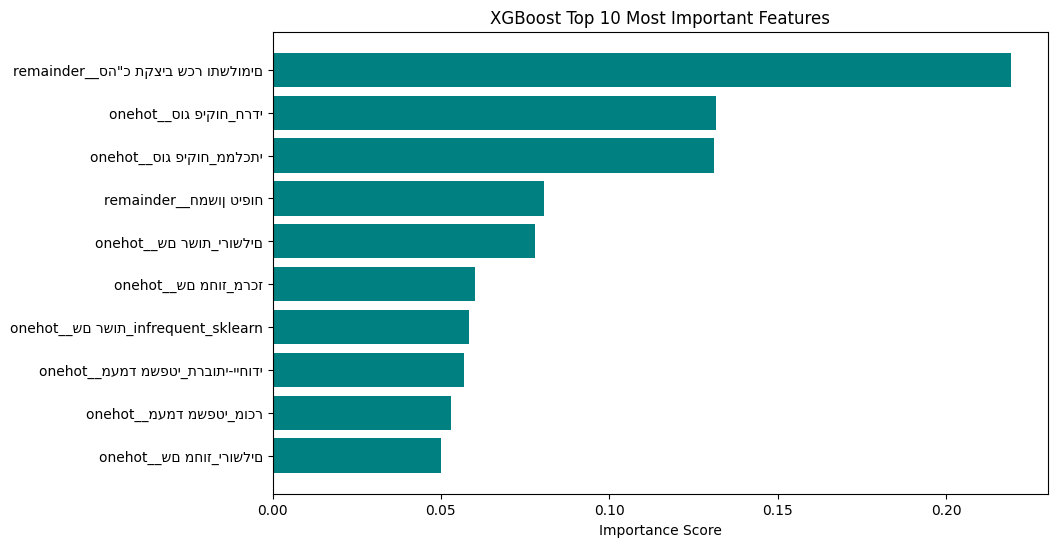

In [194]:
# Feature Importance for the best model
feature_importances_XGBoost = XGBoost__best_model.feature_importances_  # XGBoost gives feature_importances_
sorted_indices_XGBoost = np.argsort(feature_importances_XGBoost)[::-1]

# Print top 10 features
print("\n\tXGBoost Feature Importances")
for i, index in enumerate(sorted_indices_XGBoost[:10]):  # Top 10 most important features
    print(f"{i+1}. {X_train.columns[index]}: {feature_importances_XGBoost[index]:.4f}")

# Plotting Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_indices_XGBoost[:10]], feature_importances_XGBoost[sorted_indices_XGBoost[:10]], color='teal')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("XGBoost Top 10 Most Important Features")
plt.show()

##### SFS XGbost

In [181]:
### CODE BY GPT###
# Defining a custom scorer for F1 score
my_f1_scorer = make_scorer(f1_score)  

# Precision, Recall, F-Score support for the predictions
precision_recall_fscore_support(y_true=y_test, y_pred=y_pred_XG, pos_label=0) 

# Feature Selection (Forward Selection)
sfs_XGBoost = SFS(
    XGBoost__best_model,  
    k_features='best',  
    forward=True,  
    floating=False,  # fixed number of features
    scoring=my_f1_scorer,  
)

# Running the feature selection process
sfs_XGBoost.fit(X_train, y_train) 
###

SequentialFeatureSelector(estimator=XGBClassifier(base_score=0.5,
                                                  booster='gbtree',
                                                  callbacks=None,
                                                  colsample_bylevel=1,
                                                  colsample_bynode=1,
                                                  colsample_bytree=1.0,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric='logloss',
                                                  gamma=0, gpu_id=-1,
                                                  grow_policy='depthwise',
                                                  importance_type=None,
                                                  interaction_constraints='',
                                                  learning_rate=0.01,
                                                  max_bin=256,
                                                  max_cat_to_onehot=4,
                                                  max_delta_step=0, max_depth=3,
                                                  max_leaves=0,
                                                  min_child_weight=1,
                                                  missing=nan,
                                                  monotone_constraints='()',
                                                  n_estimators=200, n_jobs=0,
                                                  num_parallel_tree=1,
                                                  predictor='auto',
                                                  random_state=42, reg_alpha=0,
                                                  reg_lambda=1, ...),
                          k_features=(1, 33),
                          scoring=make_scorer(f1_score, response_method='predict'))

In [210]:
### CODE BY GPT###
# Selecting the best features after feature selection
selected_features_XGBoost = list(sfs_XGBoost.k_feature_names_)
X_train_selected_XGBoost = X_train[selected_features_XGBoost]
X_test_selected_XGBoost  = X_test[selected_features_XGBoost]

# Training the model with the selected features
XGBoost_model.fit(X_train_selected_XGBoost, y_train)

# Making predictions with the selected features
y_pred_selected_XGBoost = XGBoost_model.predict(X_test_selected_XGBoost)
####

# Print classification report for the selected features
print("\n\tXGBoost SFS Classification report (Selected Features):")
print(classification_report(y_test, y_pred_selected_XGBoost, digits=3))

# Calculating Confusion Matrix 
conf_matrix = confusion_matrix(y_test, y_pred_selected_XGBoost)
print("\nXGBoost SFS Confusion Matrix:")
print(conf_matrix)


	XGBoost SFS Classification report (Selected Features):
              precision    recall  f1-score   support

           0      0.733     0.688     0.710        16
           1      0.996     0.997     0.996      1251

    accuracy                          0.993      1267
   macro avg      0.865     0.842     0.853      1267
weighted avg      0.993     0.993     0.993      1267


XGBoost SFS Confusion Matrix:
[[  11    5]
 [   4 1247]]



XGBoost SFS Feature Importances
1. remainder__סה"כ תקציב שכר ותשלומים: 0.2192
2. onehot__סוג פיקוח_חרדי: 0.1316
3. onehot__סוג פיקוח_ממלכתי: 0.1310
4. remainder__חמשון טיפוח: 0.0805
5. onehot__שם רשות_ירושלים: 0.0779
6. onehot__שם מחוז_מרכז: 0.0601
7. onehot__שם רשות_infrequent_sklearn: 0.0584
8. onehot__מעמד משפטי_תרבותי-ייחודי: 0.0570
9. onehot__מעמד משפטי_מוכר: 0.0530
10. onehot__שם מחוז_ירושלים: 0.0501


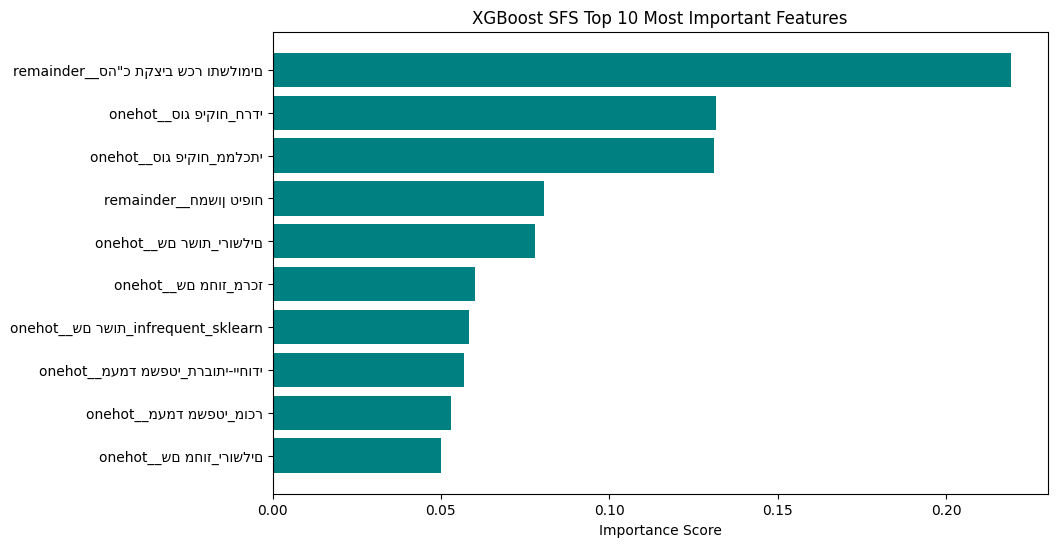

In [183]:
# Feature Importance for the best model
feature_importances_XGBoost_SFS = XGBoost__best_model.feature_importances_  # XGBoost gives feature_importances_
sorted_indices_XGBoost_SFS = np.argsort(feature_importances_XGBoost_SFS)[::-1]

# Print top 10 features
print("\nXGBoost SFS Feature Importances")
for i, index in enumerate(sorted_indices_XGBoost_SFS[:10]):  # Top 10 most important features
    print(f"{i+1}. {X_train.columns[index]}: {feature_importances_XGBoost_SFS[index]:.4f}")

# Plotting Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_indices_XGBoost_SFS[:10]], feature_importances_XGBoost_SFS[sorted_indices_XGBoost_SFS[:10]], color='teal')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("XGBoost SFS Top 10 Most Important Features")
plt.show()

#### XGBoost & Random Forest Evaluation with Bagging and Voting Classifier

In [199]:
### CODE BY GPT###
# Create a Voting Classifier that Combines XGBoost and Random Forest
voting_model_XGBoost_RF = VotingClassifier(
    estimators=[('XGBoost', XGBoost__best_model), ('RF', RF_model)],
    voting='soft'
)

# Train the Combined Voting Classifier
voting_model_XGBoost_RF.fit(X_train, y_train)

# Make Predictions with the Trained Voting Classifier
y_pred_voting_XGBoost_RF = voting_model_XGBoost_RF.predict(X_test)

# Evaluate the Combined Model
print("\n\tXGBoost_RF Classification Report:")
print(classification_report(y_test, y_pred_voting_XGBoost_RF, digits=3))

print("\nXGBoost_RF Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_voting_XGBoost_RF))
####


	XGBoost_RF Classification Report:
              precision    recall  f1-score   support

           0      0.778     0.438     0.560        16
           1      0.993     0.998     0.996      1251

    accuracy                          0.991      1267
   macro avg      0.885     0.718     0.778      1267
weighted avg      0.990     0.991     0.990      1267


XGBoost_RF Confusion Matrix:
[[   7    9]
 [   2 1249]]



	 XGBoost_RF Feature Importances
1. remainder__סה"כ תקציב שכר ותשלומים: 0.3790
2. onehot__סוג פיקוח_חרדי: 0.0815
3. onehot__סוג פיקוח_ממלכתי: 0.0761
4. remainder__חמשון טיפוח: 0.0592
5. onehot__שם רשות_ירושלים: 0.0583
6. onehot__שלבי חינוך במוסד_עליונה בלבד: 0.0563
7. onehot__שם מחוז_ירושלים: 0.0451
8. onehot__מעמד משפטי_מוכר: 0.0448
9. onehot__שם רשות_infrequent_sklearn: 0.0387
10. onehot__מעמד משפטי_תרבותי-ייחודי: 0.0350


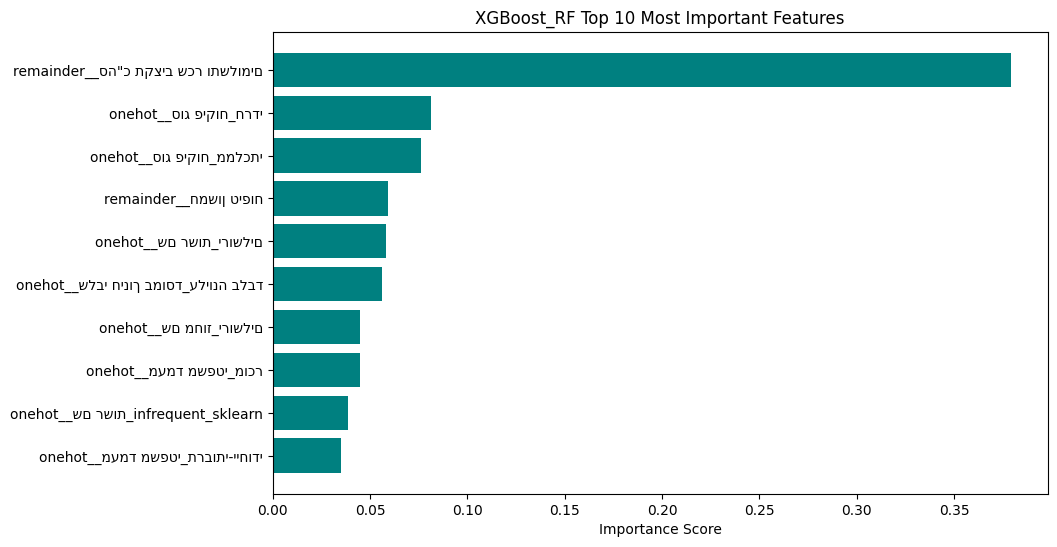

In [200]:
### CODE BY GPT###
# Average the feature importances
feature_importances_voting_XGBoost_RF = (feature_importances_RF + feature_importances_XGBoost) / 2

# Sort feature importances
sorted_indices_voting_XGBoost_RF = np.argsort(feature_importances_voting_XGBoost_RF)[::-1]
####

# Feature Importance Output
print("\n\t XGBoost_RF Feature Importances")
for i, index in enumerate(sorted_indices_voting_XGBoost_RF[:10]):  # Top 10 features
    print(f"{i+1}. {X_train.columns[index]}: {feature_importances_voting_XGBoost_RF[index]:.4f}")

# Plotting Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_indices_voting_XGBoost_RF[:10]], feature_importances_voting_XGBoost_RF[sorted_indices_voting_XGBoost_RF[:10]], color='teal')
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("XGBoost_RF Top 10 Most Important Features")
plt.show()


#### Internal Metrics Comparison Across Models

In [214]:
### CODE BY GPT###
# Create a dictionary to store the metrics for each model
evaluation_metrics = {
    "Model": [],
    "Class 0 Precision": [],
    "Class 0 Recall": [],
    "Class 0 F1 Score": [],
    "Class 1 Precision": [],
    "Class 1 Recall": [],
    "Class 1 F1 Score": [],
    "Confusion Matrix": []
}

# List of Models and Predictions
models_predictions = {
    "SVC": y_pred_svm,
    "GBM": y_pred_gbm,
    "GBM SFS": y_pred_selected_GBM,
    "Random Forest": y_pred_RF,
    "Random Forest SFS": y_pred_selected_RF,
    "XGBoost": y_pred_XG,
    "XGBoost SFS": y_pred_selected_XGBoost,
    "XGBoost_RF Combined": y_pred_voting_XGBoost_RF
}

# Loop through each model and calculate metrics for both classes
for model_name, y_pred in models_predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    evaluation_metrics["Model"].append(model_name)
    evaluation_metrics["Class 0 Precision"].append(report["0"]["precision"])
    evaluation_metrics["Class 0 Recall"].append(report["0"]["recall"])
    evaluation_metrics["Class 0 F1 Score"].append(report["0"]["f1-score"])
    evaluation_metrics["Class 1 Precision"].append(report["1"]["precision"])
    evaluation_metrics["Class 1 Recall"].append(report["1"]["recall"])
    evaluation_metrics["Class 1 F1 Score"].append(report["1"]["f1-score"])
    evaluation_metrics["Confusion Matrix"].append(cm)

# Convert to DataFrame for better visualization
metrics_df = pd.DataFrame(evaluation_metrics)
metrics_df.set_index("Model", inplace=True)

# Display the DataFrame
print("\n*** Model Evaluation Metrics by Class ***")
print(metrics_df)
####


*** Model Evaluation Metrics by Class ***
                     Class 0 Precision  Class 0 Recall  Class 0 F1 Score  \
Model                                                                      
SVC                           0.148148          1.0000          0.258065   
GBM                           0.733333          0.6875          0.709677   
GBM SFS                       0.687500          0.6875          0.687500   
Random Forest                 0.833333          0.3125          0.454545   
Random Forest SFS             0.727273          0.5000          0.592593   
XGBoost                       0.800000          0.5000          0.615385   
XGBoost SFS                   0.733333          0.6875          0.709677   
XGBoost_RF Combined           0.777778          0.4375          0.560000   

                     Class 1 Precision  Class 1 Recall  Class 1 F1 Score  \
Model                                                                      
SVC                           1.000000      